<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [15]:
# Check for GPU
!nvidia-smi

zsh:1: command not found: nvidia-smi


In [16]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.0.1


'cpu'

## 1. What are 3 areas in industry where computer vision is currently being used?

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

Overfitting là khi mô hình học dữ liệu training quá tốt nên k thể khai quát được dữ liệu unseen (memories)

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

`Regularization techniques`

`Use diffirent model`

`Clean up data / data augmentation`

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [17]:
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch import nn 
import matplotlib.pyplot as plt

train_data = datasets.MNIST(root=".",
                            train=True,
                            transform=ToTensor(),
                            download=True)

test_data = datasets.MNIST(root=".",
                           train=False,
                           transform=ToTensor(),
                           download=True)


In [18]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [19]:
train_data, test_data

(Dataset MNIST
     Number of datapoints: 60000
     Root location: .
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: .
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [20]:
print(f"Shape Image {image.shape}")
print(f"Length: {len(train_data.data)}, {len(train_data.targets)}, {len(test_data.data)}, {len(test_data.targets)}")

Shape Image torch.Size([1, 28, 28])
Length: 60000, 60000, 10000, 10000


In [21]:
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

## 6. Visualize at least 5 different samples of the MNIST training dataset.

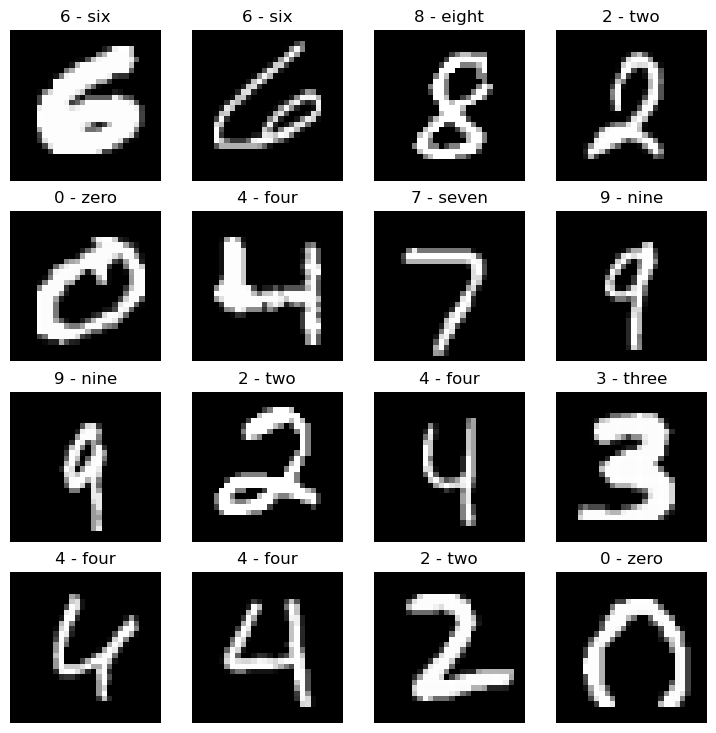

In [22]:
torch.manual_seed(42)

nrows, ncols = 4,4 
plt.figure(figsize=(9,9))

for i in range(1, nrows * ncols + 1):
    rand_idx = torch.randint(0, len(train_data),size=[1]).item()
    img, label = train_data[rand_idx]
    plt.subplot(nrows, ncols, i)
    plt.imshow(img.squeeze(),cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [23]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True,
                              )

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

print(f"DataLoader: {train_dataloader, test_dataloader}")
print(f"Length of Train DataLoader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of Test DataLoader: {len(test_dataloader)} batches of {BATCH_SIZE}")


DataLoader: (<torch.utils.data.dataloader.DataLoader object at 0x168c86f90>, <torch.utils.data.dataloader.DataLoader object at 0x168b266d0>)
Length of Train DataLoader: 1875 batches of 32
Length of Test DataLoader: 313 batches of 32


In [24]:
train_feature_batch,train_label_batch =  next(iter(train_dataloader))
train_feature_batch.shape, train_label_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [25]:
class MNISTModelV2(nn.Module):
    def __init__(self, input_shape: int, hidden_unit: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_unit,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_unit,
                      out_channels=hidden_unit,
                      kernel_size=3,
                      stride=1,
                      padding=1),
                      nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2)
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_unit,hidden_unit, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_unit, hidden_unit, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classify = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_unit * 7 * 7,
                      out_features=output_shape)
        )
    def forward(self,x:torch.Tensor):
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.classify(x)
        return x

torch.manual_seed(42)
model_2 = MNISTModelV2(input_shape=1,
                       hidden_unit=10,
                       output_shape=len(class_names)).to(device)
model_2

MNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classify): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [26]:
from tqdm.auto import tqdm
torch.manual_seed(42)

model_cpu = MNISTModelV2(input_shape=1,
                         hidden_unit=10,
                         output_shape=10).to("cpu")

# Create loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_cpu.parameters(),lr=0.1)

# Training loop
epochs = 5
for epoch in tqdm(range(epochs)):
    train_loss = 0
    for batch, (X, y) in enumerate(train_dataloader):
        X, y = X.to("cpu"), y.to("cpu")
        model_cpu.train()

        # Forward pass
        y_logits = model_cpu(X)

        # Calculate loss/accuracy
        loss = loss_fn(y_logits, y)
        train_loss += loss

        # Optimizer zero
        optimizer.zero_grad()

        # Loss backward
        loss.backward()

        # Optimizer step
        optimizer.step()
    
    train_loss /= len(train_dataloader)

    test_total_loss = 0
    model_cpu.eval()
    with torch.inference_mode():
        for batch, (X_test,y_test) in enumerate(test_dataloader):
            X_test, y_test = X_test.to("cpu"), y_test.to("cpu")
            #Forward pass
            test_pred = model_cpu(X_test)
            #Calculate loss
            test_loss = loss_fn(test_pred, y_test)
            test_total_loss += test_loss
        test_total_loss /= len(test_dataloader)
    
    print(f"Epoch: {epoch}, Train Loss: {train_loss:.5f} | Test Loss: {test_total_loss:.5f}")

/Users/macbook/anaconda3/envs/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


 20%|██        | 1/5 [00:28<01:53, 28.42s/it]

Epoch: 0, Train Loss: 0.26601 | Test Loss: 0.07600


 40%|████      | 2/5 [00:56<01:24, 28.28s/it]

Epoch: 1, Train Loss: 0.06879 | Test Loss: 0.04301


 60%|██████    | 3/5 [01:25<00:56, 28.49s/it]

Epoch: 2, Train Loss: 0.05372 | Test Loss: 0.04285


 80%|████████  | 4/5 [01:53<00:28, 28.47s/it]

Epoch: 3, Train Loss: 0.04439 | Test Loss: 0.04497


100%|██████████| 5/5 [02:21<00:00, 28.37s/it]

Epoch: 4, Train Loss: 0.03960 | Test Loss: 0.03523


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

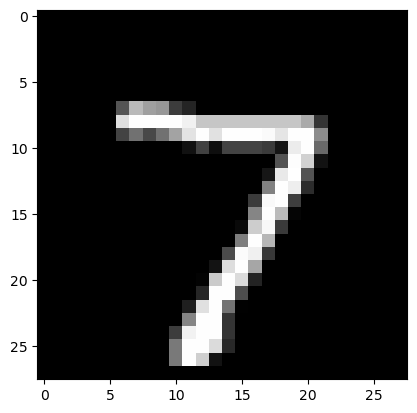

In [27]:
plt.imshow(test_data[0][0].squeeze(), cmap="gray")

In [28]:
y_logit = model_cpu(test_data[0][0].unsqueeze(dim=0)).to(device)
y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
y_pred

tensor([7])

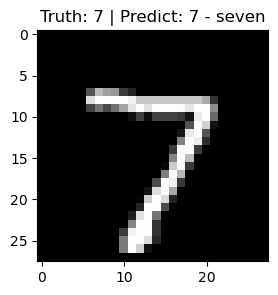

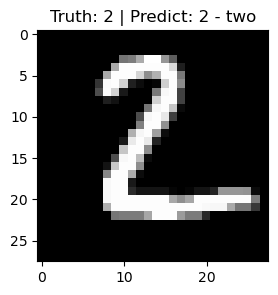

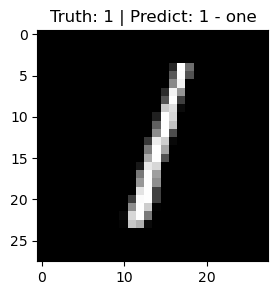

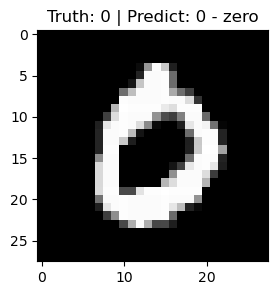

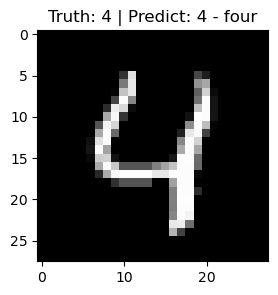

In [29]:
num_to_plot = 5

for i in range(num_to_plot):
    sample = test_data[i][0]
    label = test_data[i][1]
    y_logit = model_cpu(sample.unsqueeze(dim=0)).to(device)
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
    plt.figure(figsize=(3,3))
    plt.imshow(sample.squeeze(), cmap="gray")
    plt.title(f"Truth: {label} | Predict: {class_names[y_pred.item()]}")

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [30]:
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
except:
    !pip install -q torchmetrics -U mlxtend
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.23.1


In [31]:
from tqdm.auto import tqdm

y_preds = []
model_cpu.eval()
with torch.inference_mode():
    for X,y in tqdm(test_dataloader, desc="Making prediction"):
        X, y = X.to(device), y.to(device)
        #Forward pass
        y_logit = model_cpu(X)
        y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
        y_preds.append(y_pred)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor, test_data.targets


Making prediction: 100%|██████████| 313/313 [00:01<00:00, 302.89it/s]


(tensor([7, 2, 1,  ..., 4, 5, 6]), tensor([7, 2, 1,  ..., 4, 5, 6]))

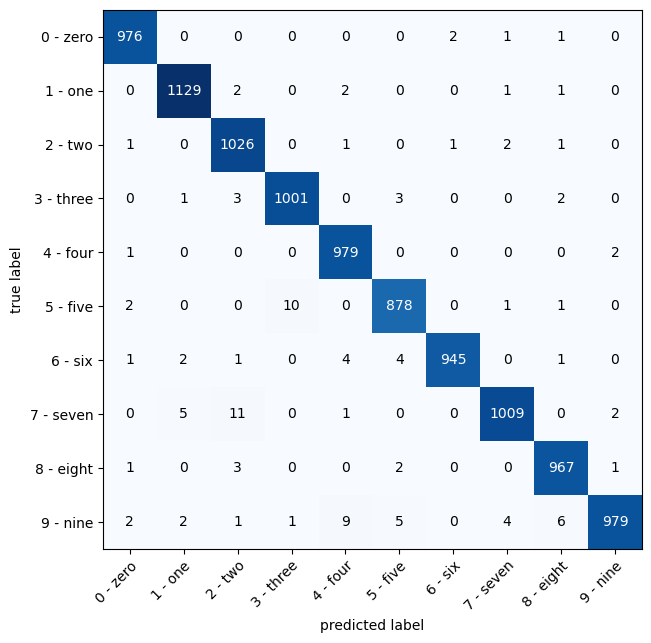

In [32]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes= len(class_names), task="multiclass")
confmat_tensor = confmat(preds=y_pred_tensor,
                         target= test_data.targets)

#plot confusion matrix
ax, fig = plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),
                                class_names=class_names,
                                figsize=(10,7))

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [33]:
tensor_random = torch.rand(1,3,64,64)
tensor_random.shape
conv = nn.Conv2d(in_channels=3,
                        out_channels=10,
                        kernel_size=3,
                        stride=2,
                        padding=1)
tensor_conv = conv(tensor_random)
tensor_conv.shape

torch.Size([1, 10, 32, 32])

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [34]:
import torchvision
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt
fashion_mnist_train = datasets.FashionMNIST(root="/Users/macbook/Documents/WorkSpace/PytorchStepByStep/data",
                                            train=True,
                                            download=False,
                                            transform=transforms.ToTensor())

fashion_mnist_test = datasets.FashionMNIST(root="/Users/macbook/Documents/WorkSpace/PytorchStepByStep/data",
                                           train=False,
                                           download=False,
                                           transform=transforms.ToTensor())
len(fashion_mnist_train), len(fashion_mnist_test)

(60000, 10000)

In [35]:
class_names = fashion_mnist_train.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [36]:
#Prepare data
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_dataloader = DataLoader(dataset=fashion_mnist_train,
                              batch_size=BATCH_SIZE,
                              shuffle=True)
test_dataloader = DataLoader(dataset=fashion_mnist_test,
                             batch_size=BATCH_SIZE,
                             shuffle=False)
len(train_dataloader), len(test_dataloader)

(1875, 313)

## Visualize data

Text(0.5, 1.0, 'Ankle boot')

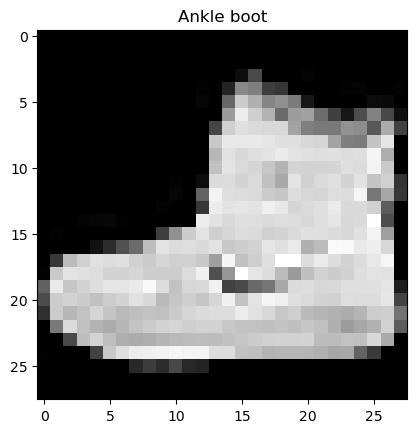

In [37]:
image, label = fashion_mnist_train[0]
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])

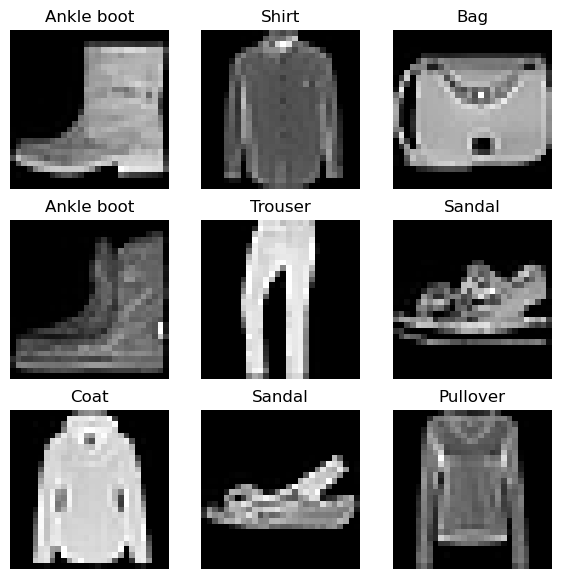

In [38]:
import torch
torch.manual_seed(42)
plt.figure(figsize=(7,7))
nrows, ncols = 3, 3

for i in range(1, nrows*ncols+1):
    plt.subplot(nrows, ncols, i)
    rand_idx = torch.randint(0,len(fashion_mnist_train),size=[1]).item()
    sample, label = fashion_mnist_train[rand_idx]
    plt.imshow(sample.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

In [39]:
# Create loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

In [41]:
from tqdm.auto import tqdm
from torchmetrics import Accuracy

accuracy_fn = Accuracy(task= "multiclass", num_classes = len(class_names))
torch.manual_seed(42)

epochs = 5
for epoch in tqdm(range(epochs)):
    train_loss, train_acc = 0, 0
    test_total_loss, test_total_acc = 0, 0
    for batch, (X, y) in enumerate(train_dataloader):
        model_2.train()
        # Send data to target device
        X, y = X.to(device), y.to(device)
        # forward pass
        y_preds = model_2(X)
        # y_preds = torch.softmax(y_logits, dim=1).argmax(dim=1)
        # Calculate loss, accuracy
        loss = loss_fn(y_preds,y )
        train_loss += loss
        acc = accuracy_fn(y_preds, y)
        train_acc += acc

        #Optimizer zero
        optimizer.zero_grad()

        # Backpropagation
        loss.backward()

        # Optimizer step
        optimizer.step()
    train_acc/= len(train_dataloader)
    train_loss/= len(train_dataloader)

    model_2.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            X_test, y_test = X_test.to(device), y_test.to(device)

            # Forward pass
            test_preds = model_2(X_test)
            
            # Calculate the loss/accuracy
            test_loss = loss_fn(test_preds, y_test)
            test_total_loss += test_loss

            test_acc = accuracy_fn(test_preds, y_test)
            test_total_acc += test_acc

        test_total_loss /= len(test_dataloader)
        test_total_acc /= len(test_dataloader)

    print(f"Epoch: {epoch} | Train Loss: {train_loss:.5f}, Train Accuracy: {train_acc:.2f} | Test Loss: {test_total_loss:.5f}, Test Accuracy: {test_total_acc:.2f}")



 20%|██        | 1/5 [00:29<01:59, 29.77s/it]

Epoch: 0 | Train Loss: 0.36069, Train Accuracy: 0.87 | Test Loss: 0.35974, Test Accuracy: 0.87


 40%|████      | 2/5 [00:59<01:28, 29.52s/it]

Epoch: 1 | Train Loss: 0.32411, Train Accuracy: 0.88 | Test Loss: 0.32921, Test Accuracy: 0.88


 60%|██████    | 3/5 [01:28<00:58, 29.34s/it]

Epoch: 2 | Train Loss: 0.30453, Train Accuracy: 0.89 | Test Loss: 0.32990, Test Accuracy: 0.88


 80%|████████  | 4/5 [01:58<00:29, 29.79s/it]

Epoch: 3 | Train Loss: 0.29066, Train Accuracy: 0.89 | Test Loss: 0.30587, Test Accuracy: 0.89


100%|██████████| 5/5 [02:29<00:00, 29.89s/it]

Epoch: 4 | Train Loss: 0.28043, Train Accuracy: 0.90 | Test Loss: 0.28927, Test Accuracy: 0.90


In [53]:
from tqdm.auto import tqdm
#Make predictions 
test_preds = []
model_2.eval()
with torch.inference_mode():
    for X_test, y_test in tqdm(test_dataloader):
        X_test, y_test = X_test.to(device), y_test.to(device)
        y_logits = model_2(X_test)
        y_preds = torch.softmax(y_logits, dim=1).argmax(dim=1)
        test_preds.append(y_preds)
    test_preds = torch.cat(test_preds)
test_preds[:10], fashion_mnist_test.targets[:10]


100%|██████████| 313/313 [00:01<00:00, 291.49it/s]


(tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7]),
 tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7]))

In [58]:
import numpy as np
# Get wrong indexes
wrong_indexes = np.where(test_preds != fashion_mnist_test.targets)[0]
len(wrong_indexes)

1036

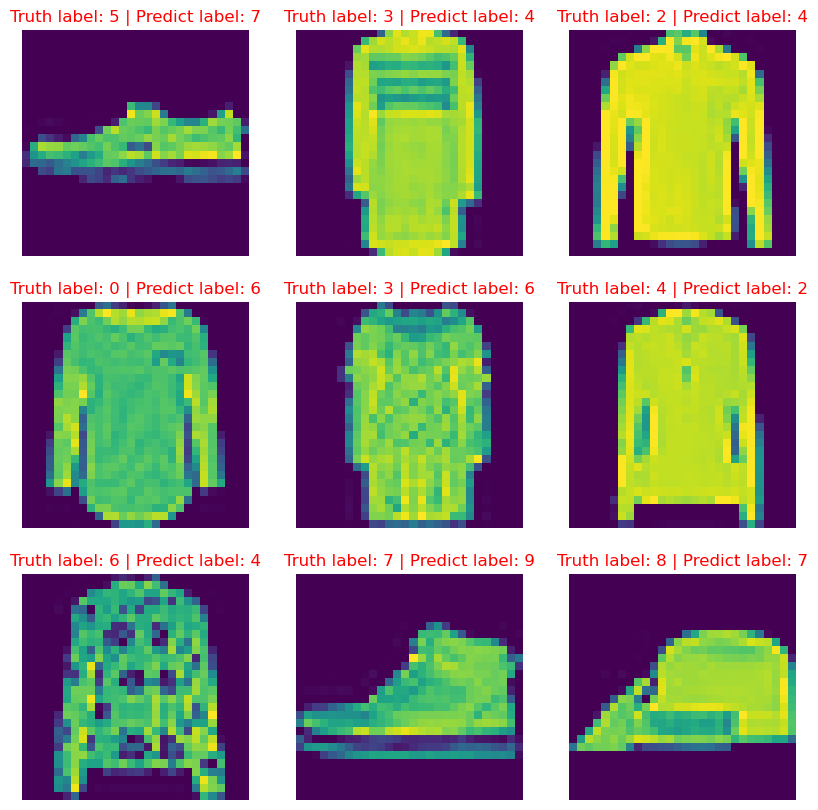

In [62]:
# Select random 9 wrong predictions and plot them
import random
random_selection = random.sample(list(wrong_indexes), k=9)

plt.figure(figsize=(10,10))
for i, idx in enumerate(random_selection):
    true_label = fashion_mnist_test[idx][1]
    pred_label = test_preds[idx]
    plt.subplot(3,3,i+1)
    plt.imshow(fashion_mnist_test[idx][0].squeeze())
    plt.title(f"Truth label: {true_label} | Predict label: {pred_label}", c="r")
    plt.axis(False)

In [63]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

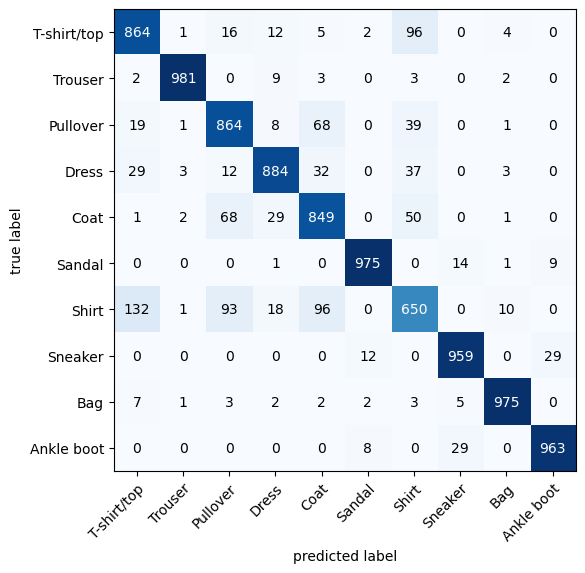

In [65]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes=len(class_names), task="multiclass")
confmat_tensor = confmat(preds= test_preds,
                         target= fashion_mnist_test.targets)

fig, ax = plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),
                                class_names=class_names,
                                figsize=(6,6))